In [1]:
# !python3 --version
# !pip --version
# !pip install xgboost
# !pip install catboost
# !pip install pyforest
# !pip install --upgrade category_encoders
# !pip install lightgbm

# Добавление нужных библиотек

In [2]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pyforest
from datetime import datetime
from datetime import date, timedelta
from category_encoders import TargetEncoder
from lightgbm import LGBMRegressor
warnings.filterwarnings('ignore')
from catboost import CatBoostRegressor

# 0. Загрузка исходных данных

In [3]:
location = pd.read_csv('LOCATION.csv', delimiter=';')

product = pd.read_csv('PRODUCT.csv', delimiter=';')

ss = pd.read_csv('sample_submission.csv')

test = pd.read_csv('test.csv')

train = pd.read_csv('train.csv')

In [4]:
location

,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,...,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,277,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,278,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
2,279,183,183,20,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
3,280,211,211,12,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
4,281,221,221,3,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1482,227,227,2,1,NaN,NaN,30Nov2019:03:40:21,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1204,1483,124,124,19,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1205,1484,24,24,11,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1206,1485,124,124,19,1,NaN,NaN,28Dec2019:10:4

In [5]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STORE_LOCATION_RK                 1208 non-null   int64  
 1   STORE_LOCATION_LVL_RK4            1208 non-null   int64  
 2   STORE_LOCATION_LVL_RK3            1208 non-null   int64  
 3   STORE_LOCATION_LVL_RK2            1208 non-null   int64  
 4   STORE_LOCATION_LVL_RK1            1208 non-null   int64  
 5   STORE_OPEN_DTTM                   0 non-null      float64
 6   STORE_CLOSURE_DTTM                0 non-null      float64
 7   VALID_FROM_DTTM                   1208 non-null   object 
 8   VALID_TO_DTTM                     1208 non-null   object 
 9   PROCESSED_DTTM                    1208 non-null   object 
 10  STORE_LOCATION_ADK_hashing        1208 non-null   object 
 11  STORE_LOCATION_ID_hashing         1208 non-null   object 
 12  STORE_

In [6]:
product

,PRODUCT_RK,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM,...,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
0,11316,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
1,11317,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2,11318,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
3,11319,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4,11320,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171603,191028,190706,6196,113158,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,B748B7A8EE4559D5BA632F0F079BDAC7,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171604,191029,73057,113184,6204,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171605,191030,73057,113184,6204,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171606,191031,73057,113184,6204,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,...,CE6E6B615231B052EF75AEDBED6491A5,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D

In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171608 entries, 0 to 171607
Data columns (total 67 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCT_RK                 171608 non-null  int64  
 1   PRODUCT_LVL_RK6            171608 non-null  int64  
 2   PRODUCT_LVL_RK5            171608 non-null  int64  
 3   PRODUCT_LVL_RK4            171608 non-null  int64  
 4   PRODUCT_LVL_RK3            171608 non-null  int64  
 5   PRODUCT_LVL_RK2            171608 non-null  int64  
 6   PRODUCT_LVL_RK1            171608 non-null  int64  
 7   SALES_INTRODUCTION_DT      0 non-null       float64
 8   SALES_DISCONTINUED_DT      0 non-null       float64
 9   VALID_FROM_DTTM            171608 non-null  object 
 10  VALID_TO_DTTM              171608 non-null  object 
 11  PROCESSED_DTTM             171608 non-null  object 
 12  PRODUCT_ADK_hashing        171608 non-null  object 
 13  PRODUCT_ID_hashing         17

In [8]:
ss

,id,demand
0,16,1.0
1,7867,1.0
2,8667,1.0
3,14835,1.0
4,14959,1.0
...,...,...
588,203996,1.0
589,203997,1.0
590,204035,1.0
591,204037,1.0


In [9]:
# расширили колонки test по ключу, так как они совпадают с train
test = train[train['id'].isin(ss['id'].tolist())].copy()
del test['demand']  # деманд не нужен так как его предсказываем
index_answer = test['id'].tolist()
test

,period_dt,location_id,product_id,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id
10,2019-12-30,1162.0,22939.0,0.0,0.0,3649.0,2189.40,0.0,1.0,16
7781,2019-12-30,1162.0,23162.0,0.0,0.0,3799.0,2279.40,0.0,1.0,7867
8574,2019-12-16,1162.0,23163.0,0.0,0.0,3799.0,2849.25,0.0,1.0,8667
14686,2019-12-23,798.0,23632.0,0.0,0.0,3999.0,2399.40,0.0,1.0,14835
14797,2019-12-30,1347.0,23633.0,0.0,0.0,3999.0,2999.25,0.0,1.0,14959
...,...,...,...,...,...,...,...,...,...,...
199484,2019-12-16,1326.0,139157.0,1.0,0.0,4899.0,2449.50,0.0,1.0,203996
199485,2019-12-09,1347.0,139157.0,0.0,0.0,4899.0,3674.25,0.0,0.0,203997
199521,2019-12-09,425.0,148040.0,0.0,0.0,3549.0,2661.75,0.0,1.0,204035
199523,2019-12-09,525.0,148040.0,0.0,0.0,3549.0,2661.75,0.0,1.0,204037


In [10]:
train

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1
1,2019-12-30,525.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,3
2,2019-12-30,557.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,5
3,2019-12-30,562.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,7
4,2019-12-30,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...
2333098,2019-12-30,NaN,NaN,NaN,1.0,0.0,3949.0,2369.40,0.0,1.0,2337654
2333099,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337655
2333100,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337656
2333101,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337657


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333103 entries, 0 to 2333102
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   period_dt          object 
 1   location_id        float64
 2   product_id         float64
 3   demand             float64
 4   PROMO1_FLAG        float64
 5   PROMO2_FLAG        float64
 6   PRICE_REGULAR      float64
 7   PRICE_AFTER_DISC   float64
 8   NUM_CONSULTANT     float64
 9   AUTORIZATION_FLAG  float64
 10  id                 int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 195.8+ MB


–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Помимо train, test у нас есть еще 2 полезные таблицы, логично как-то использовать их, например, как дополнительные фичи

# Заметим, что в данных product_id и PRODUCT_RK это одно и тоже, тогда мы можем объединить(смерджить две таблицы) по ключу, то есть где product_id == PRODUCT_RK

In [12]:
# Для удобности поменяем название, чтобы совпадали в двух таблицах
product.rename(columns = {'PRODUCT_RK':'product_id'}, inplace = True)

In [13]:
# Взяли именно такой срез, так как эти данные несут в себе очевидно прикладной смысл для конечной модели
# Так же были попробованны  SALES_INTRODUCTION_DT, ALES_DISCONTINUED_DT, VALID_FROM_DTTM\VALID_TO_DTTM, PROCESSED_DTTM 
# ну а hashing использовать, вроде бы - незачем 
product_new = product[['product_id','PRODUCT_LVL_RK6','PRODUCT_LVL_RK5',
                              'PRODUCT_LVL_RK4','PRODUCT_LVL_RK3','PRODUCT_LVL_RK2']]

In [14]:
train = pd.merge(train, product_new , on=['product_id'],how='left')

In [15]:
train

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1,3876.0,3865.0,72946.0,3752.0,9848.0
1,2019-12-30,525.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,3,3876.0,3865.0,72946.0,3752.0,9848.0
2,2019-12-30,557.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,5,3876.0,3865.0,72946.0,3752.0,9848.0
3,2019-12-30,562.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,7,3876.0,3865.0,72946.0,3752.0,9848.0
4,2019-12-30,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,0.0,9,3876.0,3865.0,72946.0,3752.0,9848.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333098,2019-12-30,NaN,NaN,NaN,1.0,0.0,3949.0,2369.40,0.0,1.0,2337654,NaN,NaN,NaN,NaN,NaN
2333099,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337655,NaN,NaN,NaN,NaN,NaN
2333100,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337656,NaN,NaN,NaN,NaN,NaN
2333101,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337657,NaN,NaN,NaN,NaN,NaN


In [16]:
test = pd.merge(test, product_new , on=['product_id'], how='left')
test

,period_dt,location_id,product_id,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2
0,2019-12-30,1162.0,22939.0,0.0,0.0,3649.0,2189.40,0.0,1.0,16,3876,3865,72946,3752,9848
1,2019-12-30,1162.0,23162.0,0.0,0.0,3799.0,2279.40,0.0,1.0,7867,9912,3865,72946,3752,9848
2,2019-12-16,1162.0,23163.0,0.0,0.0,3799.0,2849.25,0.0,1.0,8667,9912,3865,72946,3752,9848
3,2019-12-23,798.0,23632.0,0.0,0.0,3999.0,2399.40,0.0,1.0,14835,9912,3865,72946,3752,9848
4,2019-12-30,1347.0,23633.0,0.0,0.0,3999.0,2999.25,0.0,1.0,14959,9912,3865,72946,3752,9848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,2019-12-16,1326.0,139157.0,1.0,0.0,4899.0,2449.50,0.0,1.0,203996,9912,3865,72946,3752,9848
589,2019-12-09,1347.0,139157.0,0.0,0.0,4899.0,3674.25,0.0,0.0,203997,9912,3865,72946,3752,9848
590,2019-12-09,425.0,148040.0,0.0,0.0,3549.0,2661.75,0.0,1.0,204035,3885,3865,72946,3752,9848
591,2019-12-09,525.0,148040.0,0.0,0.0,3549.0,2661.75,0.0,1.0,204037,3885,3865,72946,3752,9848


# Аналогично гдя location

In [17]:
# Для удобности поменяем название, чтобы совпадали в двух таблицах
location.rename(columns = {'STORE_LOCATION_RK':'location_id'}, inplace = True)

In [18]:
location_new = location[['location_id','STORE_LOCATION_LVL_RK4',
                         'STORE_LOCATION_LVL_RK3','STORE_LOCATION_LVL_RK2']]

In [19]:
train = pd.merge(train, location_new, on=['location_id'],how='left')

In [20]:
train

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1,3876.0,3865.0,72946.0,3752.0,9848.0,203.0,203.0,10.0
1,2019-12-30,525.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,3,3876.0,3865.0,72946.0,3752.0,9848.0,54.0,54.0,10.0
2,2019-12-30,557.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,5,3876.0,3865.0,72946.0,3752.0,9848.0,54.0,54.0,10.0
3,2019-12-30,562.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,7,3876.0,3865.0,72946.0,3752.0,9848.0,36.0,36.0,10.0
4,2019-12-30,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,0.0,9,3876.0,3865.0,72946.0,3752.0,9848.0,54.0,54.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333098,2019-12-30,NaN,NaN,NaN,1.0,0.0,3949.0,2369.40,0.0,1.0,2337654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2333099,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2333100,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2333101,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
test = pd.merge(test, location_new , on=['location_id'], how='left')
test

,period_dt,location_id,product_id,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2
0,2019-12-30,1162.0,22939.0,0.0,0.0,3649.0,2189.40,0.0,1.0,16,3876,3865,72946,3752,9848,189,189,10
1,2019-12-30,1162.0,23162.0,0.0,0.0,3799.0,2279.40,0.0,1.0,7867,9912,3865,72946,3752,9848,189,189,10
2,2019-12-16,1162.0,23163.0,0.0,0.0,3799.0,2849.25,0.0,1.0,8667,9912,3865,72946,3752,9848,189,189,10
3,2019-12-23,798.0,23632.0,0.0,0.0,3999.0,2399.40,0.0,1.0,14835,9912,3865,72946,3752,9848,203,203,10
4,2019-12-30,1347.0,23633.0,0.0,0.0,3999.0,2999.25,0.0,1.0,14959,9912,3865,72946,3752,9848,189,189,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,2019-12-16,1326.0,139157.0,1.0,0.0,4899.0,2449.50,0.0,1.0,203996,9912,3865,72946,3752,9848,203,203,10
589,2019-12-09,1347.0,139157.0,0.0,0.0,4899.0,3674.25,0.0,0.0,203997,9912,3865,72946,3752,9848,189,189,10
590,2019-12-09,425.0,148040.0,0.0,0.0,3549.0,2661.75,0.0,1.0,204035,3885,3865,72946,3752,9848,203,203,10
591,2019-12-09,525.0,148040.0,0.0,0.0,3549.0,2661.75,0.0,1.0,204037,3885,3865,72946,3752,9848,54,54,10


# Можно еще убрать столбец id, так как смысла в нем нет

In [22]:
train.drop(columns='id', inplace=True)
test.drop(columns='id', inplace=True)

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# 1. Предобработка
# Теперь нужно разобраться с пропусками в данных

In [23]:
train.isna().sum(), test.isna().sum()

(period_dt                       0
 location_id               2048984
 product_id                2048984
 demand                    2058632
 PROMO1_FLAG                  1797
 PROMO2_FLAG                  1797
 PRICE_REGULAR              810628
 PRICE_AFTER_DISC           831151
 NUM_CONSULTANT               1797
 AUTORIZATION_FLAG            1797
 PRODUCT_LVL_RK6           2048984
 PRODUCT_LVL_RK5           2048984
 PRODUCT_LVL_RK4           2048984
 PRODUCT_LVL_RK3           2048984
 PRODUCT_LVL_RK2           2048984
 STORE_LOCATION_LVL_RK4    2048984
 STORE_LOCATION_LVL_RK3    2048984
 STORE_LOCATION_LVL_RK2    2048984
 dtype: int64,
 period_dt                  0
 location_id                0
 product_id                 0
 PROMO1_FLAG                5
 PROMO2_FLAG                5
 PRICE_REGULAR             10
 PRICE_AFTER_DISC          10
 NUM_CONSULTANT             5
 AUTORIZATION_FLAG          5
 PRODUCT_LVL_RK6            0
 PRODUCT_LVL_RK5            0
 PRODUCT_LVL_RK4         

# Как видно в demand у нас довольно много Nan, хотя это целевая переменная, которую мы будем предсказывать, поэтому пропущенные значения для нас не информативны, уберем их

In [24]:
train = train[train['demand'].notna()].copy()

In [25]:
train.isna().sum(), train.dtypes

(period_dt                    0
 location_id                  0
 product_id                   0
 demand                       0
 PROMO1_FLAG               1791
 PROMO2_FLAG               1791
 PRICE_REGULAR             6583
 PRICE_AFTER_DISC          8140
 NUM_CONSULTANT            1791
 AUTORIZATION_FLAG         1791
 PRODUCT_LVL_RK6              0
 PRODUCT_LVL_RK5              0
 PRODUCT_LVL_RK4              0
 PRODUCT_LVL_RK3              0
 PRODUCT_LVL_RK2              0
 STORE_LOCATION_LVL_RK4       0
 STORE_LOCATION_LVL_RK3       0
 STORE_LOCATION_LVL_RK2       0
 dtype: int64,
 period_dt                  object
 location_id               float64
 product_id                float64
 demand                    float64
 PROMO1_FLAG               float64
 PROMO2_FLAG               float64
 PRICE_REGULAR             float64
 PRICE_AFTER_DISC          float64
 NUM_CONSULTANT            float64
 AUTORIZATION_FLAG         float64
 PRODUCT_LVL_RK6           float64
 PRODUCT_LVL_RK5        

# О! очень много пропусков было завязано на demand, а те, которые остались - численные, существуют известные методы как заполнять такие пропуски, но для начала первично посмотрим на них

In [26]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
location_id,274471.0,887.299165,344.495491,309.00,557.000000,862.000000,1281.000000,1380.0
product_id,274471.0,60502.102488,29073.786470,22939.00,32990.000000,62261.000000,83275.000000,149522.0
demand,274471.0,0.418661,0.725600,0.00,0.038356,0.103395,0.724179,48.0
PROMO1_FLAG,272680.0,0.421960,0.520525,0.00,0.000000,0.000000,1.000000,3.0
PROMO2_FLAG,272680.0,0.002633,0.051246,0.00,0.000000,0.000000,0.000000,1.0
PRICE_REGULAR,267888.0,3328.855404,938.780253,369.00,2849.000000,3499.000000,3849.000000,13149.0
PRICE_AFTER_DISC,266331.0,2221.734909,681.803009,4.96,1749.500000,2174.250000,2661.750000,11049.0
NUM_CONSULTANT,272680.0,0.354148,1.268765,0.00,0.000000,0.000000,0.000000,8.0
AUTORIZATION_FLAG,272680.0,0.871699,0.334425,0.00,1.000000,1.000000,1.000000,1.0
PRODUCT_LVL_RK6,274471.0,6792.511242,2936.331758,3867.00,3881.000000,6165.000000,9912.000000,9932.0


array([[<AxesSubplot:title={'center':'location_id'}>,
        <AxesSubplot:title={'center':'product_id'}>],
       [<AxesSubplot:title={'center':'demand'}>,
        <AxesSubplot:title={'center':'PROMO1_FLAG'}>],
       [<AxesSubplot:title={'center':'PROMO2_FLAG'}>,
        <AxesSubplot:title={'center':'PRICE_REGULAR'}>],
       [<AxesSubplot:title={'center':'PRICE_AFTER_DISC'}>,
        <AxesSubplot:title={'center':'NUM_CONSULTANT'}>],
       [<AxesSubplot:title={'center':'AUTORIZATION_FLAG'}>,
        <AxesSubplot:title={'center':'PRODUCT_LVL_RK6'}>],
       [<AxesSubplot:title={'center':'PRODUCT_LVL_RK5'}>,
        <AxesSubplot:title={'center':'PRODUCT_LVL_RK4'}>],
       [<AxesSubplot:title={'center':'PRODUCT_LVL_RK3'}>,
        <AxesSubplot:title={'center':'PRODUCT_LVL_RK2'}>],
       [<AxesSubplot:title={'center':'STORE_LOCATION_LVL_RK4'}>,
        <AxesSubplot:title={'center':'STORE_LOCATION_LVL_RK3'}>],
       [<AxesSubplot:title={'center':'STORE_LOCATION_LVL_RK2'}>,
        <Ax

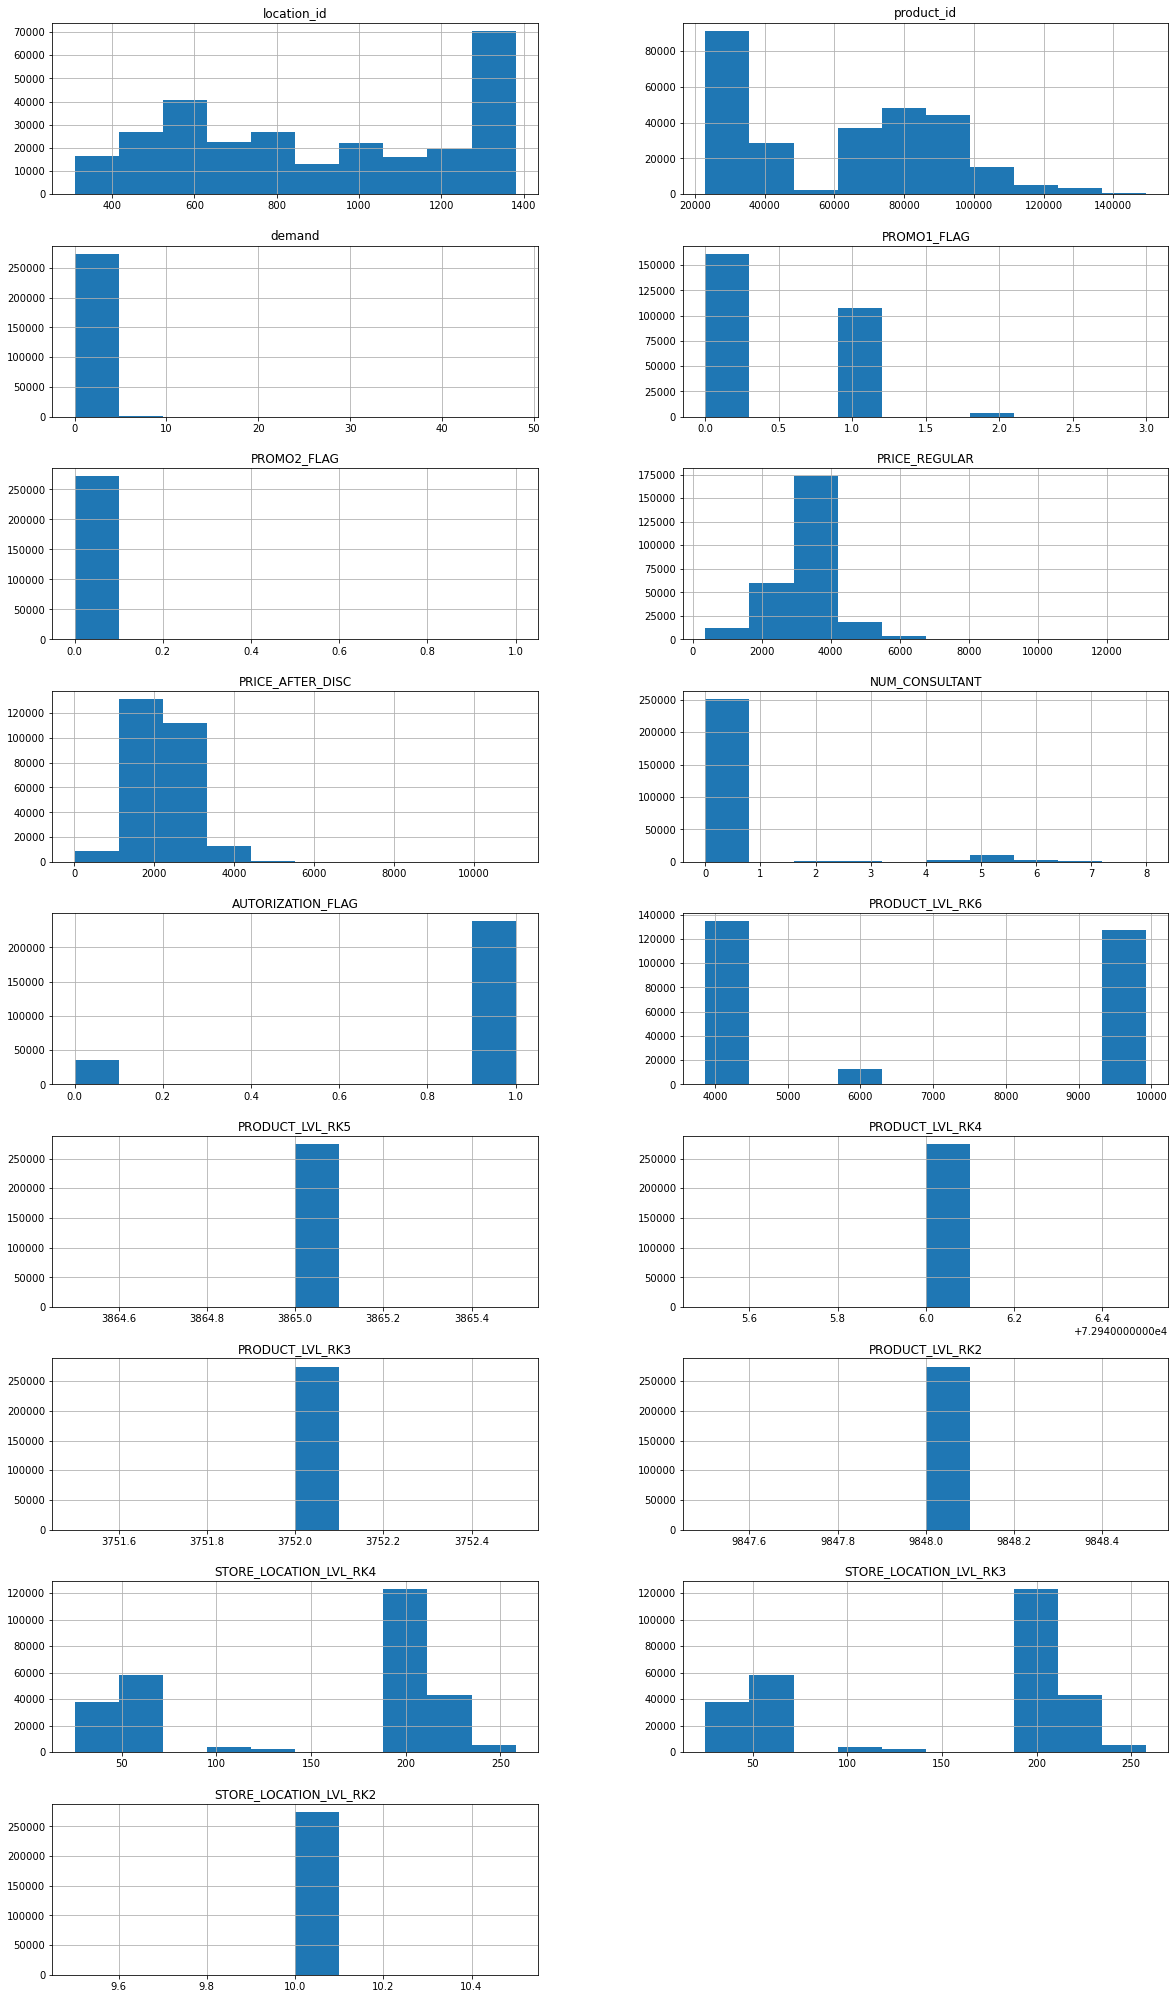

In [27]:
train.hist(figsize=(20,40), layout = (10, 2))

# Для 'PROMO1_FLAG', 'PROMO2_FLAG', 'NUM_CONSULTANT' будем использовать тактику заполнения самым частым, то есть 0
# Для 'AUTORIZATION_FLAG' - самое частое 1
# ДЛЯ 'PRICE_REGULAR', 'PRICE_AFTER_DISC' - средним значением

In [28]:
train['PROMO1_FLAG'].fillna(0, inplace=True)
train['PROMO2_FLAG'].fillna(0, inplace=True)
train['NUM_CONSULTANT'].fillna(0, inplace=True)

train['AUTORIZATION_FLAG'].fillna(1, inplace=True)

train['PRICE_REGULAR'].fillna(np.mean(train['PRICE_REGULAR']), inplace=True)
train['PRICE_AFTER_DISC'].fillna(np.mean(train['PRICE_AFTER_DISC']), inplace=True)

In [29]:
test['PROMO1_FLAG'].fillna(0, inplace=True)
test['PROMO2_FLAG'].fillna(0, inplace=True)
test['NUM_CONSULTANT'].fillna(0, inplace=True)

test['AUTORIZATION_FLAG'].fillna(1, inplace=True)

test['PRICE_REGULAR'].fillna(np.mean(test['PRICE_REGULAR']), inplace=True)
test['PRICE_AFTER_DISC'].fillna(np.mean(test['PRICE_AFTER_DISC']), inplace=True)

In [30]:
train.isna().sum(), test.isna().sum()

(period_dt                 0
 location_id               0
 product_id                0
 demand                    0
 PROMO1_FLAG               0
 PROMO2_FLAG               0
 PRICE_REGULAR             0
 PRICE_AFTER_DISC          0
 NUM_CONSULTANT            0
 AUTORIZATION_FLAG         0
 PRODUCT_LVL_RK6           0
 PRODUCT_LVL_RK5           0
 PRODUCT_LVL_RK4           0
 PRODUCT_LVL_RK3           0
 PRODUCT_LVL_RK2           0
 STORE_LOCATION_LVL_RK4    0
 STORE_LOCATION_LVL_RK3    0
 STORE_LOCATION_LVL_RK2    0
 dtype: int64,
 period_dt                 0
 location_id               0
 product_id                0
 PROMO1_FLAG               0
 PROMO2_FLAG               0
 PRICE_REGULAR             0
 PRICE_AFTER_DISC          0
 NUM_CONSULTANT            0
 AUTORIZATION_FLAG         0
 PRODUCT_LVL_RK6           0
 PRODUCT_LVL_RK5           0
 PRODUCT_LVL_RK4           0
 PRODUCT_LVL_RK3           0
 PRODUCT_LVL_RK2           0
 STORE_LOCATION_LVL_RK4    0
 STORE_LOCATION_LVL_RK3    0

# Порядок!

# 2. Добавление фичей

# Еще на лекции нам говорили, что из одной даты модно придумать миллион дополнительных признаков, которые улучшают модель, понятное дело - перед праздниками, в выходные дни кол-во покупок будет сильно выше, так же имеет место быть периодичность итд

In [31]:
# Будем удобнее для дальнейшего использования, если мы переименуем period_dt и добавим её в конце, рядом с остальными
# временными параметрами

train['date'] = train['period_dt'].apply(pd.to_datetime)
# день в году [1,365]
train['day_of_year'] = train['date'].apply(lambda x : x.dayofyear)
# номер для в недели
train["weekday"] = train['date'].apply(lambda x : x.weekday())
# выходной день
train['is_weekend'] = train.weekday.isin([5, 6]) * 1
# номер месяца
train['month'] = train['date'].apply(lambda x : x.month)
# номер недели в году
train['week_of_year'] = train['date'].apply(lambda x : x.weekofyear)
# номер года
train['year'] = train['date'].apply(lambda x : x.year)

In [32]:
train = train.drop(columns=['period_dt'])

In [33]:
train.head()

,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,PRODUCT_LVL_RK6,...,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,date,day_of_year,weekday,is_weekend,month,week_of_year,year
15,637.0,22939.0,0.035398,1.0,0.0,3649.0,3101.65,0.0,1.0,3876.0,...,54.0,54.0,10.0,2019-12-02,336,0,0,12,49,2019
16,317.0,22939.0,1.000000,1.0,0.0,2380.0,2380.00,0.0,1.0,3876.0,...,189.0,189.0,10.0,2017-08-28,240,0,0,8,35,2017
17,355.0,22939.0,2.000000,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,54.0,54.0,10.0,2018-03-05,64,0,0,3,10,2018
18,355.0,22939.0,1.013850,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,54.0,54.0,10.0,2018-03-19,78,0,0,3,12,2018
19,355.0,22939.0,0.019391,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,54.0,54.0,10.0,2018-03-26,85,0,0,3,13,2018


In [34]:
# Тоже самое для test

test['date'] = test['period_dt'].apply(pd.to_datetime)
# день в году [1,365]
test['day_of_year'] = test['date'].apply(lambda x : x.dayofyear)
# номер для в недели
test["weekday"] = test['date'].apply(lambda x : x.weekday())
# выходной день
test['is_weekend'] = test.weekday.isin([5, 6]) * 1
# номер месяца
test['month'] = test['date'].apply(lambda x : x.month)
# номер недели в году
test['week_of_year'] = test['date'].apply(lambda x : x.weekofyear)
# номер года
test['year'] = test['date'].apply(lambda x : x.year)

In [35]:
test.head()

,period_dt,location_id,product_id,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,PRODUCT_LVL_RK6,...,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,date,day_of_year,weekday,is_weekend,month,week_of_year,year
0,2019-12-30,1162.0,22939.0,0.0,0.0,3649.0,2189.40,0.0,1.0,3876,...,189,189,10,2019-12-30,364,0,0,12,1,2019
1,2019-12-30,1162.0,23162.0,0.0,0.0,3799.0,2279.40,0.0,1.0,9912,...,189,189,10,2019-12-30,364,0,0,12,1,2019
2,2019-12-16,1162.0,23163.0,0.0,0.0,3799.0,2849.25,0.0,1.0,9912,...,189,189,10,2019-12-16,350,0,0,12,51,2019
3,2019-12-23,798.0,23632.0,0.0,0.0,3999.0,2399.40,0.0,1.0,9912,...,203,203,10,2019-12-23,357,0,0,12,52,2019
4,2019-12-30,1347.0,23633.0,0.0,0.0,3999.0,2999.25,0.0,1.0,9912,...,189,189,10,2019-12-30,364,0,0,12,1,2019


In [36]:
test = test.drop(columns=['period_dt'])

# Посмотрим какие значения лежат у нас в колонках

In [37]:
categorical = train.select_dtypes(exclude = np.number)
display(categorical.describe())
display(categorical.nunique())
for i in categorical.columns:
    display(categorical[i].value_counts())

,date
count,274471
unique,152
top,2018-12-31 00:00:00
freq,4939
first,2016-12-19 00:00:00
last,2019-12-02 00:00:00


date    152
dtype: int64

2018-12-31    4939
2017-01-02    4602
2018-01-01    4572
2019-09-09    3090
2017-11-27    3069
              ... 
2016-12-19     894
2018-02-19     807
2019-02-18     787
2017-02-27     775
2017-02-20     688
Name: date, Length: 152, dtype: int64

In [38]:
numerical = train.select_dtypes(include = np.number)
display(numerical.describe())
display(numerical.nunique())
for i in numerical.columns:
    display(numerical[i].value_counts())

,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,PRODUCT_LVL_RK6,...,PRODUCT_LVL_RK2,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,day_of_year,weekday,is_weekend,month,week_of_year,year
count,274471.000000,274471.000000,274471.000000,274471.000000,274471.000000,274471.000000,274471.000000,274471.000000,274471.000000,274471.000000,...,274471.0,274471.00000,274471.00000,274471.0,274471.000000,274471.0,274471.0,274471.000000,274471.000000,274471.000000
mean,887.299165,60502.102488,0.418661,0.419206,0.002616,3328.855404,2221.734909,0.351837,0.872537,6792.511242,...,9848.0,146.94117,146.94117,10.0,183.224501,0.0,0.0,6.544214,26.093136,2017.985580
std,344.495491,29073.786470,0.725600,0.519935,0.051079,927.453883,671.616747,1.264941,0.333492,2936.331758,...,0.0,77.80875,77.80875,0.0,107.672227,0.0,0.0,3.502358,15.347882,0.844725
min,309.000000,22939.000000,0.000000,0.000000,0.000000,369.000000,4.960000,0.000000,0.000000,3867.000000,...,9848.0,25.00000,25.00000,10.0,1.000000,0.0,0.0,1.000000,1.000000,2016.000000
25%,557.000000,32990.000000,0.038356,0.000000,0.000000,2899.000000,1750.000000,0.000000,1.000000,3881.000000,...,9848.0,54.00000,54.00000,10.0,92.000000,0.0,0.0,4.000000,13.000000,2017.000000
50%,862.000000,62261.000000,0.103395,0.000000,0.000000,3499.000000,2199.500000,0.000000,1.000000,6165.000000,...,9848.0,189.00000,189.00000,10.0,184.000000,0.0,0.0,7.000000,27.000000,2018.000000
75%,1281.000000,83275.000000,0.724179,1.000000,0.000000,3849.000000,2631.850000,0.000000,1.000000,9912.000000,...,9848.0,203.00000,203.00000,10.0,275.000000,0.0,0.0,10.000000,39.000000,2019.000000
max,1380.000000,149522.000000,48.000000,3.000000,1.000000,13149.000000,11049.000000,8.000000,1.000000,9932.000000,...,9848.0,258.00000,258.00000,10.0,365.000000,0.0,0.0,12.000000,52.000000,2019.000000


location_id                  41
product_id                 2117
demand                    16291
PROMO1_FLAG                   4
PROMO2_FLAG                   2
PRICE_REGULAR              2607
PRICE_AFTER_DISC          12712
NUM_CONSULTANT                9
AUTORIZATION_FLAG             2
PRODUCT_LVL_RK6              36
PRODUCT_LVL_RK5               1
PRODUCT_LVL_RK4               1
PRODUCT_LVL_RK3               1
PRODUCT_LVL_RK2               1
STORE_LOCATION_LVL_RK4       13
STORE_LOCATION_LVL_RK3       13
STORE_LOCATION_LVL_RK2        1
day_of_year                 152
weekday                       1
is_weekend                    1
month                        12
week_of_year                 52
year                          4
dtype: int64

1281.0    19493
764.0     15031
525.0     14606
557.0     13243
425.0     12528
1326.0    12455
657.0     12369
798.0     11766
1034.0    11583
1316.0    10800
1005.0    10443
453.0      9799
1328.0     9577
1347.0     9379
355.0      8983
1363.0     8239
1191.0     8013
637.0      7591
1162.0     6336
562.0      5863
1080.0     5110
866.0      4862
380.0      4668
862.0      4519
1185.0     4068
1203.0     3943
874.0      3657
644.0      2757
504.0      2601
1079.0     2551
540.0      2492
317.0      2467
535.0      2043
1202.0     1874
1143.0     1870
517.0      1807
1173.0     1740
555.0      1733
533.0       887
1380.0      477
309.0       248
Name: location_id, dtype: int64

31616.0     1594
76776.0     1261
88979.0     1248
62001.0     1221
76777.0     1188
            ... 
56945.0        1
56986.0        1
56996.0        1
56997.0        1
136161.0       1
Name: product_id, Length: 2117, dtype: int64

1.000000    38223
0.019178     6543
0.000000     5238
2.000000     3846
0.038356     3096
            ...  
1.068264        1
0.079710        1
0.030594        1
0.496626        1
1.006024        1
Name: demand, Length: 16291, dtype: int64

0.0    162989
1.0    108012
2.0      3362
3.0       108
Name: PROMO1_FLAG, dtype: int64

0.0    273753
1.0       718
Name: PROMO2_FLAG, dtype: int64

3849.000000    13269
3949.000000    12439
3449.000000     9579
3599.000000     8437
3499.000000     8072
               ...  
3224.000000        1
4352.571429        1
1689.000000        1
3278.285714        1
1697.000000        1
Name: PRICE_REGULAR, Length: 2607, dtype: int64

2221.734909    8140
1724.500000    4410
1974.500000    3376
2886.750000    3346
2501.850000    3271
               ... 
2611.971429       1
1800.997143       1
2316.857143       1
1280.857143       1
509.100000        1
Name: PRICE_AFTER_DISC, Length: 12712, dtype: int64

0.0    253217
5.0     11076
4.0      3010
6.0      2251
3.0      2046
2.0      1528
7.0       795
1.0       500
8.0        48
Name: NUM_CONSULTANT, dtype: int64

1.0    239486
0.0     34985
Name: AUTORIZATION_FLAG, dtype: int64

9912.0    122318
3876.0     61791
3908.0     25628
3897.0     20823
3926.0      7128
6174.0      6031
3881.0      4189
6165.0      3537
3874.0      3158
3910.0      3141
4290.0      2821
6172.0      2507
9923.0      2226
3893.0      1936
3906.0      1179
9917.0      1158
9928.0       781
6161.0       533
4295.0       492
3885.0       475
9930.0       396
3867.0       363
4288.0       347
3917.0       300
6167.0       274
3923.0       231
3872.0       183
9919.0       154
6163.0        99
3904.0        89
9910.0        65
3919.0        43
3878.0        34
9926.0        19
3889.0        16
9932.0         6
Name: PRODUCT_LVL_RK6, dtype: int64

3865.0    274471
Name: PRODUCT_LVL_RK5, dtype: int64

72946.0    274471
Name: PRODUCT_LVL_RK4, dtype: int64

3752.0    274471
Name: PRODUCT_LVL_RK3, dtype: int64

9848.0    274471
Name: PRODUCT_LVL_RK2, dtype: int64

203.0    82554
54.0     58519
219.0    43182
189.0    40516
26.0     15561
28.0      8013
36.0      5863
258.0     5801
39.0      3913
101.0     3657
25.0      2601
125.0     2551
32.0      1740
Name: STORE_LOCATION_LVL_RK4, dtype: int64

203.0    82554
54.0     58519
219.0    43182
189.0    40516
26.0     15561
28.0      8013
36.0      5863
258.0     5801
39.0      3913
101.0     3657
25.0      2601
125.0     2551
32.0      1740
Name: STORE_LOCATION_LVL_RK3, dtype: int64

10.0    274471
Name: STORE_LOCATION_LVL_RK2, dtype: int64

365    4939
2      4602
1      4572
252    3090
331    3069
       ... 
354     894
50      807
49      787
58      775
51      688
Name: day_of_year, Length: 152, dtype: int64

0    274471
Name: weekday, dtype: int64

0    274471
Name: is_weekend, dtype: int64

1     29632
7     27828
4     26042
11    24780
10    24624
9     24389
12    22721
5     22206
3     21512
6     18011
8     17924
2     14802
Name: month, dtype: int64

1     14113
44     6835
49     6802
11     6713
46     6689
48     6565
31     6323
37     6297
38     6228
18     5965
36     5942
39     5922
45     5886
21     5875
43     5868
22     5853
14     5821
5      5720
27     5679
47     5640
17     5611
20     5562
16     5561
30     5474
2      5353
23     5296
41     5292
29     5222
12     5155
28     5130
7      5072
34     4955
10     4836
13     4808
6      4773
15     4760
35     4745
4      4711
3      4674
26     4365
24     4271
33     4239
52     4236
25     4079
32     3985
40     3615
50     3482
51     3262
19     3240
42     3014
9      2675
8      2282
Name: week_of_year, dtype: int64

2019    93754
2017    93270
2018    85226
2016     2221
Name: year, dtype: int64

# 3. Добавление новых фичей

# Было бы логично добавить новые колонки, связанные с спросом. Напрашиваются значения суммарный спрос по неделям, месяцам

In [39]:
train[train['year'] == 2017][['week_of_year', 'demand']].groupby(by='week_of_year').sum()

,demand
week_of_year,
1,819.372027
2,404.733849
3,448.564997
4,520.447794
5,487.290037
6,270.386508
7,279.380732
8,668.545264
9,652.074086


In [40]:
train['demand_for_week'] = 0

years = train['year'].unique().tolist()
for year in years:
    sum_week = train[train['year'] == year][['week_of_year', 'demand']].groupby(by='week_of_year').sum()
    sum_week = dict(zip(sum_week.index.tolist(), sum_week.demand)) 
    for number_week, summa in sum_week.items():
        train.loc[(train['year'] == year) & (train['week_of_year'] == number_week), 'demand_for_week'] = summa

In [41]:
train.head()

,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,PRODUCT_LVL_RK6,...,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,date,day_of_year,weekday,is_weekend,month,week_of_year,year,demand_for_week
15,637.0,22939.0,0.035398,1.0,0.0,3649.0,3101.65,0.0,1.0,3876.0,...,54.0,10.0,2019-12-02,336,0,0,12,49,2019,1495.063113
16,317.0,22939.0,1.000000,1.0,0.0,2380.0,2380.00,0.0,1.0,3876.0,...,189.0,10.0,2017-08-28,240,0,0,8,35,2017,431.871682
17,355.0,22939.0,2.000000,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,54.0,10.0,2018-03-05,64,0,0,3,10,2018,1485.358971
18,355.0,22939.0,1.013850,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,54.0,10.0,2018-03-19,78,0,0,3,12,2018,351.542542
19,355.0,22939.0,0.019391,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,54.0,10.0,2018-03-26,85,0,0,3,13,2018,543.031571


In [42]:
train[train['year'] == 2017][['month', 'demand']].groupby(by='month').sum()

,demand
month,
1,2680.408704
2,1870.386590
3,1722.464839
4,1404.081114
5,1752.440523
6,1566.316015
7,2459.510262
8,1666.267115
9,2350.418251


In [43]:
train['demand_for_month'] = 0

for year in years:
    sum_month = train[train['year'] == year][['month', 'demand']].groupby(by='month').sum()
    sum_month = dict(zip(sum_month.index.tolist(), sum_month.demand)) 
    for number_month, summa in sum_month.items():
        train.loc[(train['year'] == year) & (train['month'] == number_month), 'demand_for_month'] = summa

# 4. Построим немного графиков!

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Спрос с течением времени')

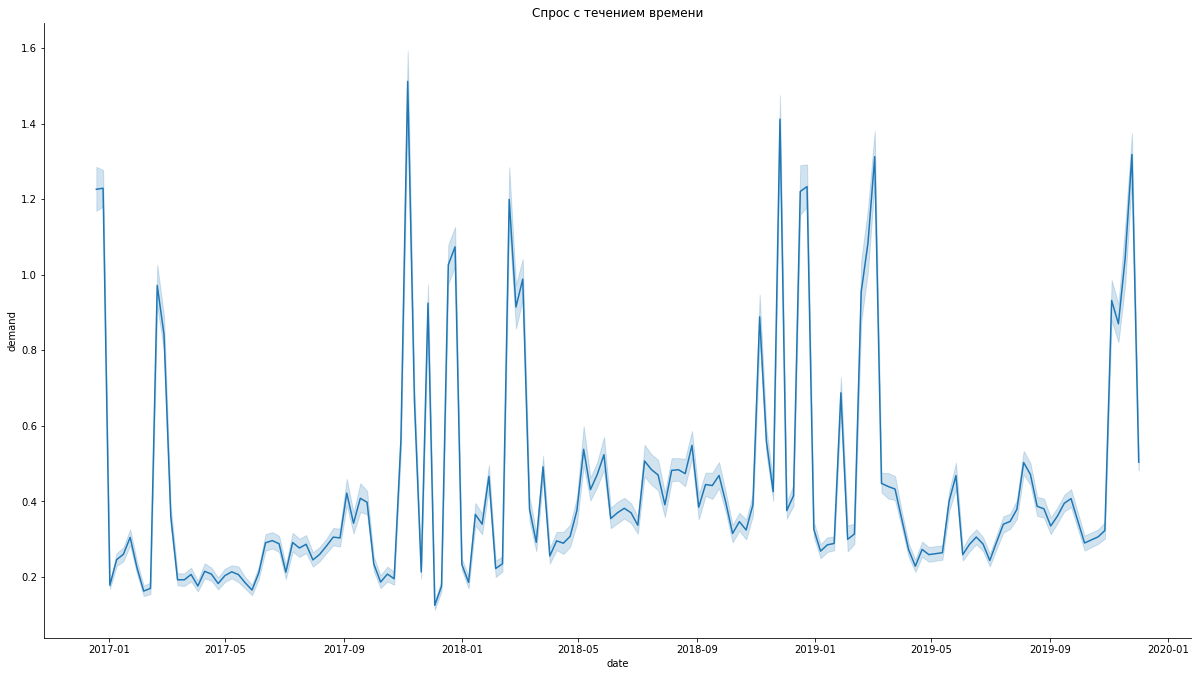

In [44]:
g = sns.relplot(data=train, x='date', y='demand', kind='line',)
g.fig.set_size_inches(20,10)
plt.title('Спрос с течением времени')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cуммарный спрос по неделям')

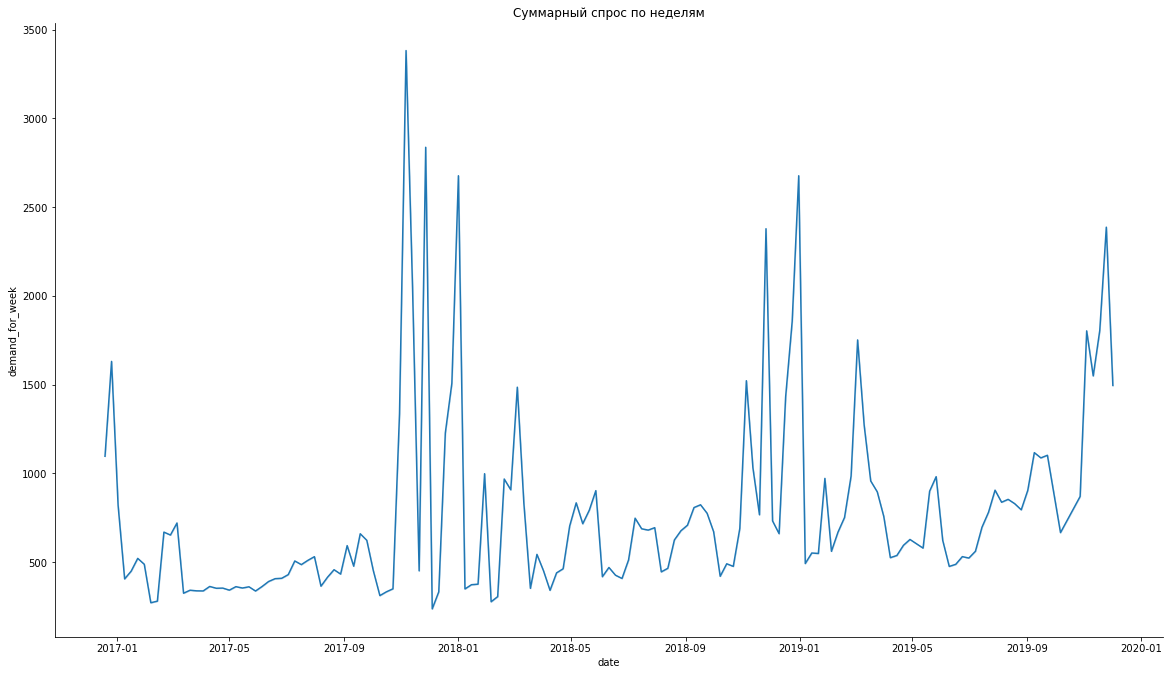

In [45]:
g = sns.relplot(data=train, x='date', y='demand_for_week', kind='line',)
g.fig.set_size_inches(20,10)
plt.title('Cуммарный спрос по неделям')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cуммарный спрос по месяцам')

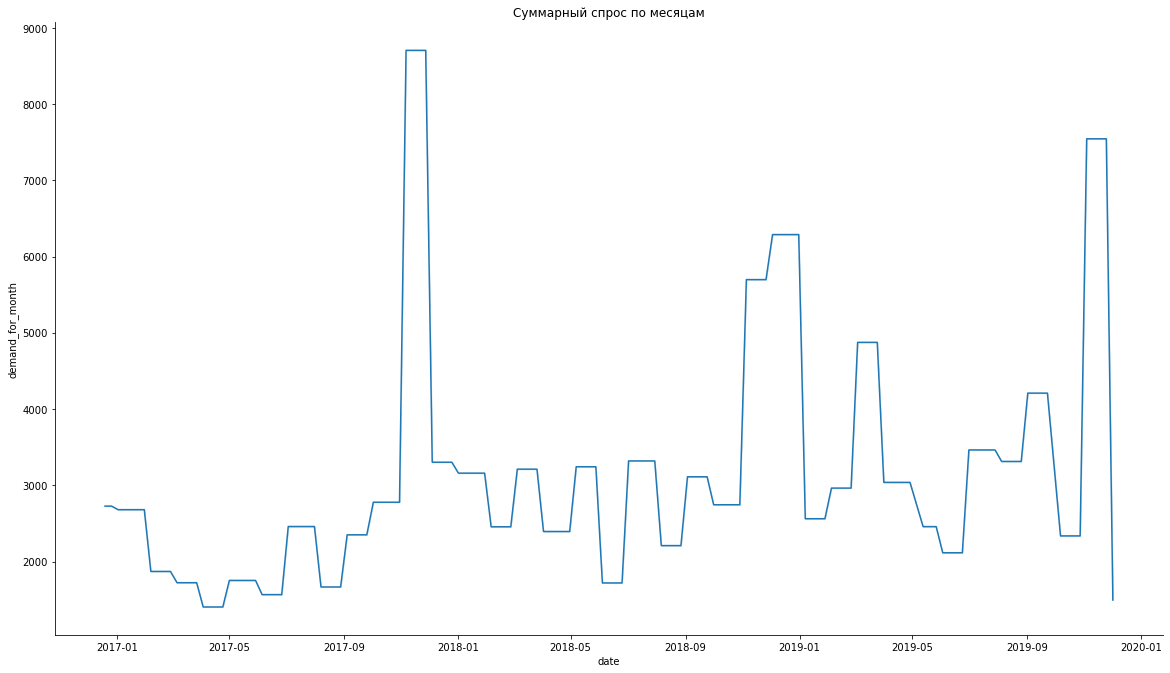

In [46]:
g = sns.relplot(data=train, x='date', y='demand_for_month', kind='line',)
g.fig.set_size_inches(20,10)
plt.title('Cуммарный спрос по месяцам')

# По графикам очень видно, что спрос - величина периодичная, особенно хотелось бы обратить внимание на пики
# Напрашивается ввести новую фичу - пики спроса

In [47]:
train['demand_for_week'].describe(), train['demand_for_month'].describe()

(count    274471.000000
 mean        852.359765
 std         626.286795
 min         235.771733
 25%         450.851674
 50%         668.545264
 75%         904.924071
 max        3382.746351
 Name: demand_for_week, dtype: float64,
 count    274471.000000
 mean       3309.777385
 std        1709.188449
 min        1404.081114
 25%        2350.418251
 50%        2778.011246
 75%        3319.351122
 max        8704.570263
 Name: demand_for_month, dtype: float64)

# Будем интерпритировать пики, как спрос выше среднего

In [48]:
test.head()

,location_id,product_id,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,...,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,date,day_of_year,weekday,is_weekend,month,week_of_year,year
0,1162.0,22939.0,0.0,0.0,3649.0,2189.40,0.0,1.0,3876,3865,...,189,189,10,2019-12-30,364,0,0,12,1,2019
1,1162.0,23162.0,0.0,0.0,3799.0,2279.40,0.0,1.0,9912,3865,...,189,189,10,2019-12-30,364,0,0,12,1,2019
2,1162.0,23163.0,0.0,0.0,3799.0,2849.25,0.0,1.0,9912,3865,...,189,189,10,2019-12-16,350,0,0,12,51,2019
3,798.0,23632.0,0.0,0.0,3999.0,2399.40,0.0,1.0,9912,3865,...,203,203,10,2019-12-23,357,0,0,12,52,2019
4,1347.0,23633.0,0.0,0.0,3999.0,2999.25,0.0,1.0,9912,3865,...,189,189,10,2019-12-30,364,0,0,12,1,2019


In [49]:
train['peak_weeks'] = train['demand_for_week'].apply(lambda x: 1 if x > 1395 else 0)

In [50]:
train['peak_months'] = train['demand_for_month'].apply(lambda x: 1 if x > 3309 else 0)

In [51]:
test['peak_weeks'] = 1
test['peak_months'] = 1

In [52]:
train[['location_id', 'demand']].groupby(by='location_id').mean().sort_values(by='demand')

,demand
location_id,
533.0,0.218085
504.0,0.223932
1173.0,0.234142
540.0,0.234395
562.0,0.235032
317.0,0.241043
644.0,0.247459
1191.0,0.259174
1079.0,0.260362


In [53]:
mean_loc_demand = train[['location_id', 'demand']].groupby(by='location_id').mean().sort_values(by='demand')

# 5. Регуляризация

In [54]:
def regular_type(x):
    if x >= 0.7:
        return 7
    elif x >= 0.5:
        return 5
    return 2

In [55]:
mean_loc_demand['type'] = mean_loc_demand['demand'].apply(regular_type)
regs = dict(zip(mean_loc_demand.index.tolist(), mean_loc_demand['type'].tolist()))

In [56]:
train['regular_type'] = train['location_id'].apply(lambda x: regs[x] if x in regs else 0)
test['regular_type'] = test['location_id'].apply(lambda x: regs[x] if x in regs else 0)

In [57]:
train

,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,PRODUCT_LVL_RK6,...,weekday,is_weekend,month,week_of_year,year,demand_for_week,demand_for_month,peak_weeks,peak_months,regular_type
15,637.0,22939.0,0.035398,1.0,0.0,3649.0,3101.65,0.0,1.0,3876.0,...,0,0,12,49,2019,1495.063113,1495.063113,1,0,2
16,317.0,22939.0,1.000000,1.0,0.0,2380.0,2380.00,0.0,1.0,3876.0,...,0,0,8,35,2017,431.871682,1666.267115,0,0,2
17,355.0,22939.0,2.000000,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,0,0,3,10,2018,1485.358971,3211.616762,1,0,2
18,355.0,22939.0,1.013850,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,0,0,3,12,2018,351.542542,3211.616762,0,0,2
19,355.0,22939.0,0.019391,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,0,0,3,13,2018,543.031571,3211.616762,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284114,1316.0,149472.0,1.000000,1.0,0.0,4449.0,2224.50,0.0,1.0,3908.0,...,0,0,11,46,2019,1548.830141,7544.147391,1,1,7
284115,1316.0,149509.0,1.000000,1.0,0.0,3999.0,1999.50,0.0,1.0,6161.0,...,0,0,11,46,2019,1548.830141,7544.147391,1,1,7
284116,1316.0,149354.0,2.000000,1.0,0.0,9799.0,4899.50,0.0,1.0,9912.0,...,0,0,11,47,2019,1805.091444,7544.147391,1,1,7
284117,1316.0,25952.0,1.000000,1.0,0.0,4299.0,2149.50,0.0,1.0,9912.0,...,0,0,11,48,2019,2387.304715,7544.147391,1,1,7


In [58]:
feat = train[['product_id', 'location_id', 'date']].groupby(by=['product_id', 'location_id']).min()
feat = feat.sort_values('date')
feat

,,date
product_id,location_id,
62406.0,1281.0,2016-12-19
62003.0,657.0,2016-12-19
40720.0,309.0,2016-12-19
32680.0,644.0,2016-12-19
37230.0,557.0,2016-12-19
...,...,...
104488.0,1380.0,2019-12-02
79893.0,1328.0,2019-12-02
130629.0,355.0,2019-12-02


In [60]:
time_dict = dict(zip(feat.index.tolist(), zip(feat.date.tolist(),
                                             (feat.date + timedelta(days=24)).tolist())))
def aggreg(x, feat):
    if (x.product_id, x.location_id) in feat:
        el = feat[(x.product_id, x.location_id)]
        if el[0] <= x.date <= el[1]:
            return 1
        else:
            return 0
    return 0

In [61]:
train['take'] = 0
train['take'] = train.apply(aggreg, args=[time_dict], axis=1)

# Главная фича сыгравшая роль

In [62]:
train = train[train['take'] == 1].copy()

In [63]:
train['take']

16        1
17        1
18        1
19        1
24        1
         ..
284114    1
284115    1
284116    1
284117    1
284118    1
Name: take, Length: 39422, dtype: int64

# 6. Построение модели

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39422 entries, 16 to 284118
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location_id             39422 non-null  float64       
 1   product_id              39422 non-null  float64       
 2   demand                  39422 non-null  float64       
 3   PROMO1_FLAG             39422 non-null  float64       
 4   PROMO2_FLAG             39422 non-null  float64       
 5   PRICE_REGULAR           39422 non-null  float64       
 6   PRICE_AFTER_DISC        39422 non-null  float64       
 7   NUM_CONSULTANT          39422 non-null  float64       
 8   AUTORIZATION_FLAG       39422 non-null  float64       
 9   PRODUCT_LVL_RK6         39422 non-null  float64       
 10  PRODUCT_LVL_RK5         39422 non-null  float64       
 11  PRODUCT_LVL_RK4         39422 non-null  float64       
 12  PRODUCT_LVL_RK3         39422 non-null  floa

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 592
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location_id             593 non-null    float64       
 1   product_id              593 non-null    float64       
 2   PROMO1_FLAG             593 non-null    float64       
 3   PROMO2_FLAG             593 non-null    float64       
 4   PRICE_REGULAR           593 non-null    float64       
 5   PRICE_AFTER_DISC        593 non-null    float64       
 6   NUM_CONSULTANT          593 non-null    float64       
 7   AUTORIZATION_FLAG       593 non-null    float64       
 8   PRODUCT_LVL_RK6         593 non-null    int64         
 9   PRODUCT_LVL_RK5         593 non-null    int64         
 10  PRODUCT_LVL_RK4         593 non-null    int64         
 11  PRODUCT_LVL_RK3         593 non-null    int64         
 12  PRODUCT_LVL_RK2         593 non-null    int64     

In [66]:
del test['date']

In [68]:
cats = ['product_id', 'location_id']

to_del = ['demand_for_week','demand_for_month', 'date', 'take']

train.drop(columns=to_del, inplace=True)

In [69]:
target = train['demand']
del train['demand']

In [70]:
encoder = TargetEncoder(cols=cats)

train = encoder.fit_transform(train, target).copy()
test = encoder.transform(test).copy()

In [71]:
regressor = CatBoostRegressor(loss_function='MAE',depth = 4).fit(train, target)
y_pred = regressor.predict(test)

0:	learn: 0.5758912	total: 192ms	remaining: 3m 11s
1:	learn: 0.5692433	total: 223ms	remaining: 1m 51s
2:	learn: 0.5623916	total: 261ms	remaining: 1m 26s
3:	learn: 0.5567336	total: 294ms	remaining: 1m 13s
4:	learn: 0.5512457	total: 331ms	remaining: 1m 5s
5:	learn: 0.5451305	total: 366ms	remaining: 1m
6:	learn: 0.5391893	total: 403ms	remaining: 57.2s
7:	learn: 0.5335998	total: 437ms	remaining: 54.2s
8:	learn: 0.5289420	total: 464ms	remaining: 51.1s
9:	learn: 0.5236153	total: 490ms	remaining: 48.5s
10:	learn: 0.5191031	total: 514ms	remaining: 46.2s
11:	learn: 0.5148487	total: 539ms	remaining: 44.4s
12:	learn: 0.5106954	total: 563ms	remaining: 42.7s
13:	learn: 0.5065740	total: 589ms	remaining: 41.5s
14:	learn: 0.5027046	total: 617ms	remaining: 40.5s
15:	learn: 0.4990766	total: 643ms	remaining: 39.5s
16:	learn: 0.4955072	total: 668ms	remaining: 38.6s
17:	learn: 0.4920012	total: 695ms	remaining: 37.9s
18:	learn: 0.4886093	total: 730ms	remaining: 37.7s
19:	learn: 0.4854849	total: 765ms	remain

In [73]:
answer = dict(zip(index_answer, y_pred.tolist()))
ss['demand'] = ss['id'].apply(lambda x: answer[x])

In [74]:
ss.to_csv('BEST.csv',index=False,header=True)